In [36]:
from datascience import *
import numpy as np
import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import collections

from urllib.request import urlopen 
import re
def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

In [37]:
anna_karenina_url = 'https://jesca.github.io/data/Anna_Karenina_Part_One.txt'
#anna_karenina_url = 'https://jesca.github.io/data/Anna_Karenina.txt'
ak_txt = read_url(anna_karenina_url)
ak_chapters = ak_txt.split('Chapter')[34:]


print(len(ak_chapters))

35


In [38]:
# Display the chapters of Huckleberry Finn in a table.

Table().with_column('Chapters', ak_chapters)

Chapters
34
1 Happy families are all alike; every unhappy family is ...
2 Stepan Arkadyevitch was a truthful man in his relatio ...
"3 When he was dressed, Stepan Arkadyevitch sprinkled so ..."
"4 Darya Alexandrovna, in a dressing jacket, and with he ..."
"5 Stepan Arkadyevitch had learned easily at school, tha ..."
6 When Oblonsky asked Levin what had brought him to tow ...
"7 On arriving in Moscow by a morning train, Levin had p ..."
"8 When the professor had gone, Sergey Ivanovitch turned ..."
"9 At four o'clock, conscious of his throbbing heart, Le ..."


Vronsky | Karenin | Anna | Konstantin | Kitty | Chapter
0       | 0       | 0    | 0          | 0     | 1
0       | 0       | 0    | 0          | 0     | 2
0       | 0       | 2    | 0          | 0     | 3
0       | 0       | 2    | 0          | 0     | 4
0       | 0       | 4    | 0          | 0     | 5
0       | 1       | 5    | 33         | 2     | 6
0       | 1       | 5    | 45         | 12    | 7
0       | 1       | 5    | 51         | 12    | 8
0       | 1       | 5    | 69         | 13    | 9
0       | 1       | 5    | 95         | 22    | 10
... (25 rows omitted)


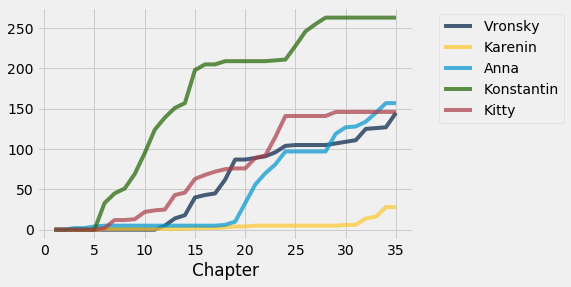

In [39]:
count_vrosnky = Table().with_columns([
        'Vronsky', np.char.count(ak_chapters, 'Vronsky'),
        'Karenin', np.char.count(ak_chapters, 'Alexey'),
        'Anna', np.char.count(ak_chapters, 'Anna'),
        'Konstantin', np.char.count(ak_chapters, 'Levin'),
        'Kitty', np.char.count(ak_chapters, 'Kitty'),
    ])

cum_counts = count_vrosnky.cumsum().with_column('Chapter', np.arange(1, 36,1))
cum_counts.plot(column_for_xticks=5)

print(cum_counts)

In [137]:
# stopwords object from stopwords.txt from https://github.com/Alir3z4/stop-words 
stopwords = set(line.strip() for line in open('stopwords.txt'))

#remove names specific to this book + other potential stop words
stopwords = stopwords.union(set(['chapter','dolly','countess','levin', 'stepan', 'vronsky', 'anna', 'kitty', 'alexey', 'now','arkadyevitch','know','well','like']))

#instantiate a dictionary for every word in the file -- don't need libraries with heavy text processing for this task
wordcount={}

# To eliminate duplicates, split by punctuation, and use case demiliters.
for word in ak_txt.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("*","")
    if word not in stopwords:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1
            

top50 = collections.Counter(wordcount).most_common(15)
top50_keys = [item[0] for item in top50]
top50_values = [item[1] for item in top50]


In [138]:
countWordsTable = Table().with_columns("Words", top50_keys, "Count", top50_values)
print(countWordsTable)

Words  | Count
come   | 103
face   | 102
eyes   | 98
go     | 97
went   | 95
see    | 86
love   | 84
felt   | 83
though | 83
yes    | 83
... (5 rows omitted)


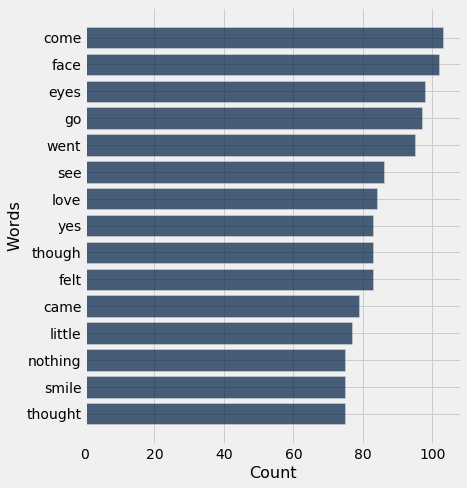

In [141]:
countWordsTable.sort('Count',descending=True).barh("Words", "Count")

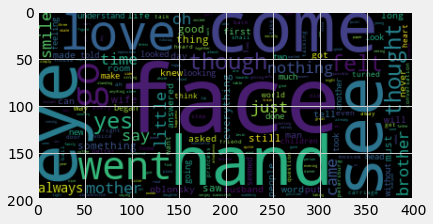

In [140]:
#wordcloud
from wordcloud import STOPWORDS, WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

wordcloud = WordCloud(stopwords=stopwords).generate(ak_txt.lower())

plt.imshow(wordcloud, interpolation='bilinear')
